In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import datetime as dt
from datetime import timedelta

In [64]:
df = pd.read_csv(r"C:\Users\user\Documents\lux bootcamp\task 2 EDA\1. Weather Data.csv")

In [65]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [66]:
#identify the shape of the dataset
df.shape

(8784, 8)

In [67]:
#know the different data types
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [68]:
#check for the missing null values
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [69]:
df.describe(include="all")

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
unique,8784,NaN,NaN,NaN,NaN,NaN,NaN,50
top,1/1/2012 0:00,NaN,NaN,NaN,NaN,NaN,NaN,Mainly Clear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2106
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN
50%,NaN,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,NaN
75%,NaN,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,NaN


In [70]:
df.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [71]:
df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [73]:
df.head(3)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


<Axes: >

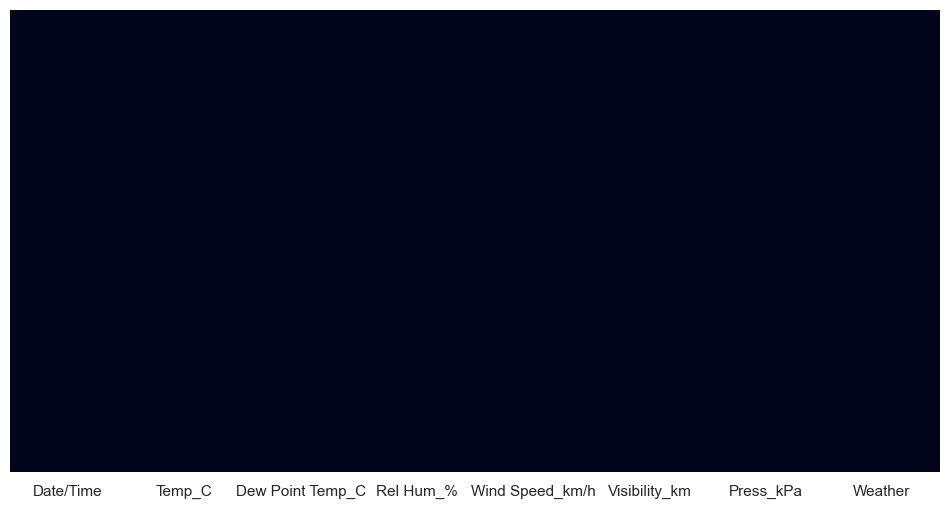

In [74]:
#heat map representing the sum of null values
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [75]:
#analyze the most frequent weather 
weather_freq = df["Weather"].value_counts().reset_index()
weather_freq.columns = ['Weather',"count"]
weather_freq

,Weather,count
0,Mainly Clear,2106
1,Mostly Cloudy,2069
2,Cloudy,1728
3,Clear,1326
4,Snow,390
5,Rain,306
6,Rain Showers,188
7,Fog,150
8,"Rain,Fog",116
9,"Drizzle,Fog",80


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


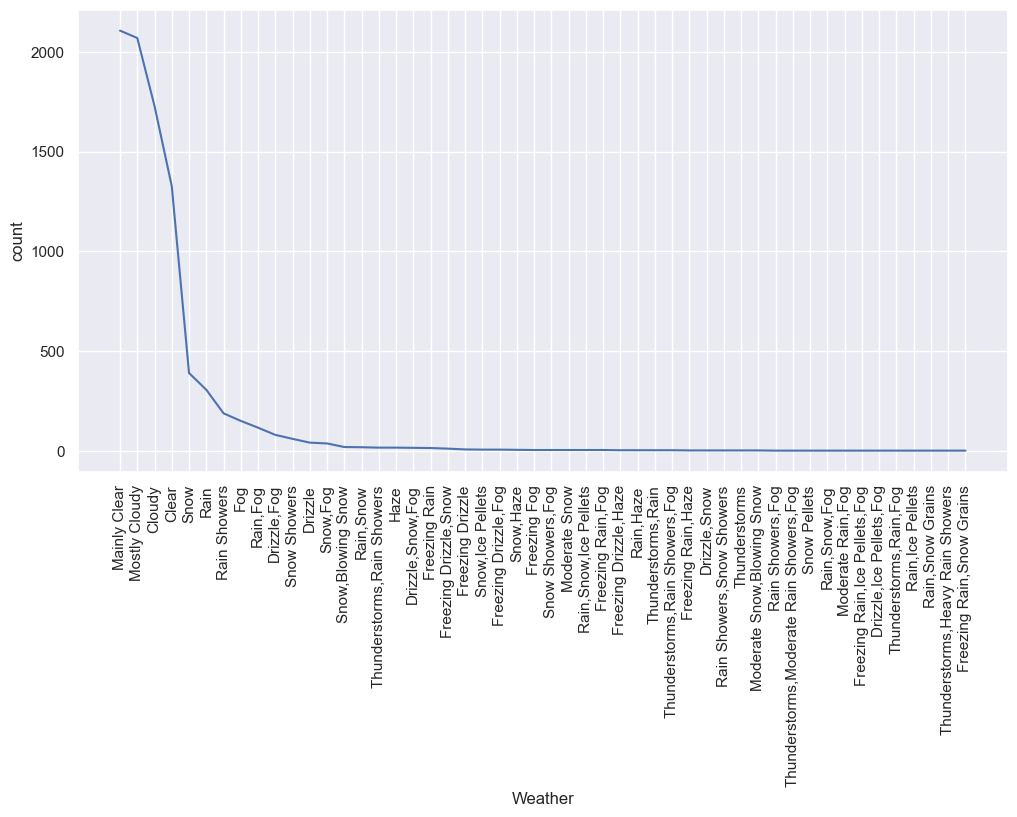

In [76]:
#here is a line plot representing the above data
sns.set(rc = {'figure.figsize':(12,6)})
plt.xticks(rotation =90)
sns.lineplot(x="Weather",y="count",data=weather_freq)
plt.show()

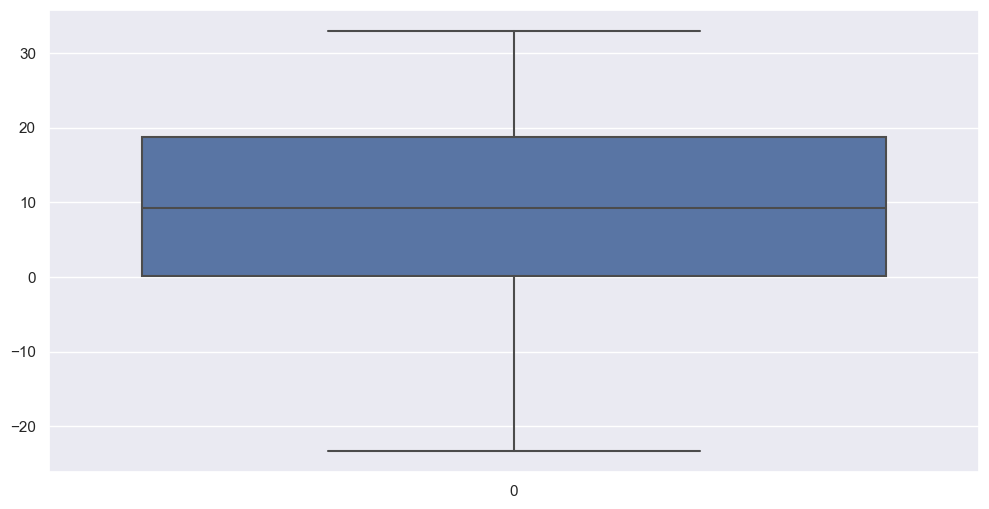

In [77]:
sns.boxplot(df['Temp_C'])
plt.show()

In [78]:
df.head(3)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


<Axes: title={'center': 'weather'}, xlabel='Weather', ylabel='Temp_C'>

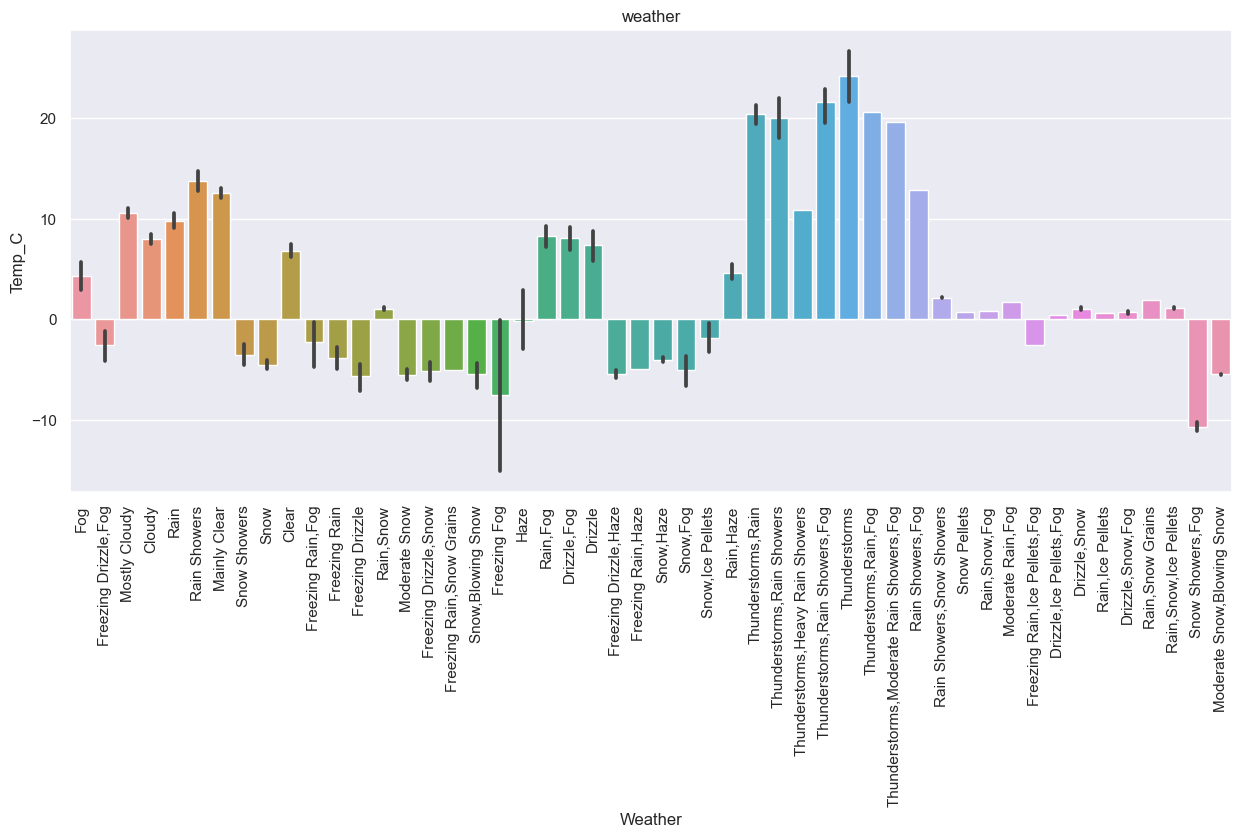

In [79]:
#weather vs temperature
plt.figure(figsize=(15,6))
plt.xticks(rotation =90)
plt.title('weather')
sns.barplot(x=df["Weather"],y=df["Temp_C"])

#from the graph we can note that the tempearture is lowest when there is snow showers and fog
#the tempearture is the highest when the weather condition is thunderstorms


<Axes: title={'center': 'weather vs dew_point'}, xlabel='Weather', ylabel='Dew Point Temp_C'>

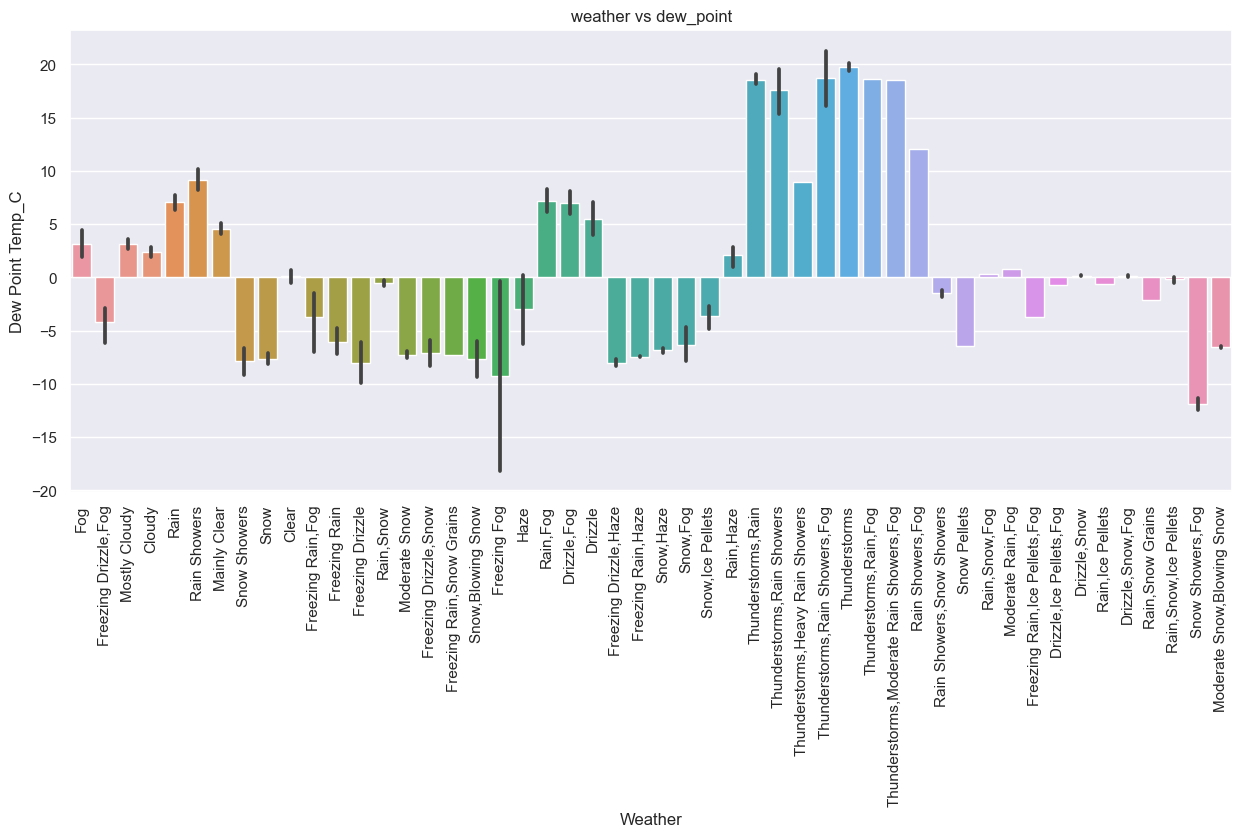

In [80]:
#weather vs dew point
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title("weather vs dew_point")
sns.barplot(y=df['Dew Point Temp_C'],x=df['Weather'])

#from the graph humidity is high in weather conditions that have a thunderstorm

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'weather vs humidity'}, xlabel='Weather', ylabel='Rel Hum_%'>

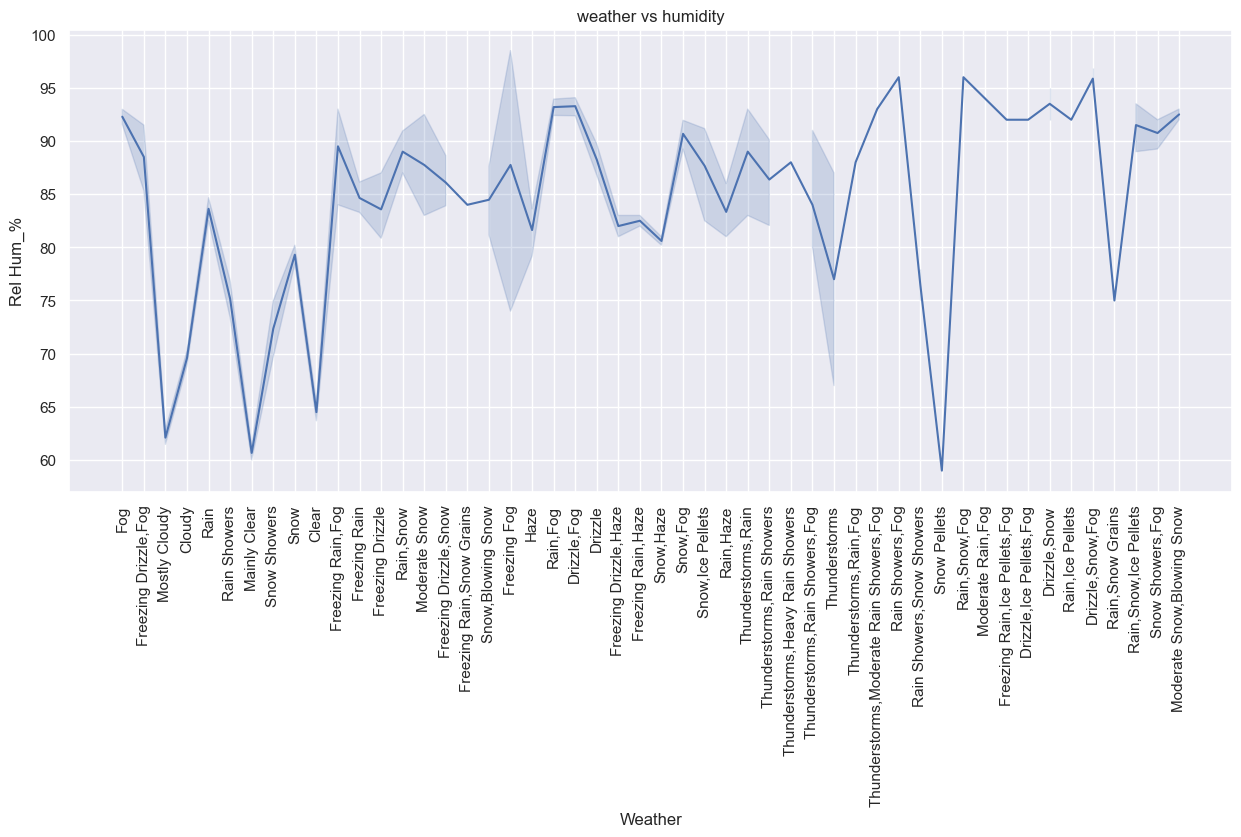

In [81]:
#weather vs humidity
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
plt.title("weather vs humidity")
sns.lineplot(y=df["Rel Hum_%"],x=df["Weather"])


<Axes: title={'center': 'weather vs windspeed'}, xlabel='Weather', ylabel='Wind Speed_km/h'>

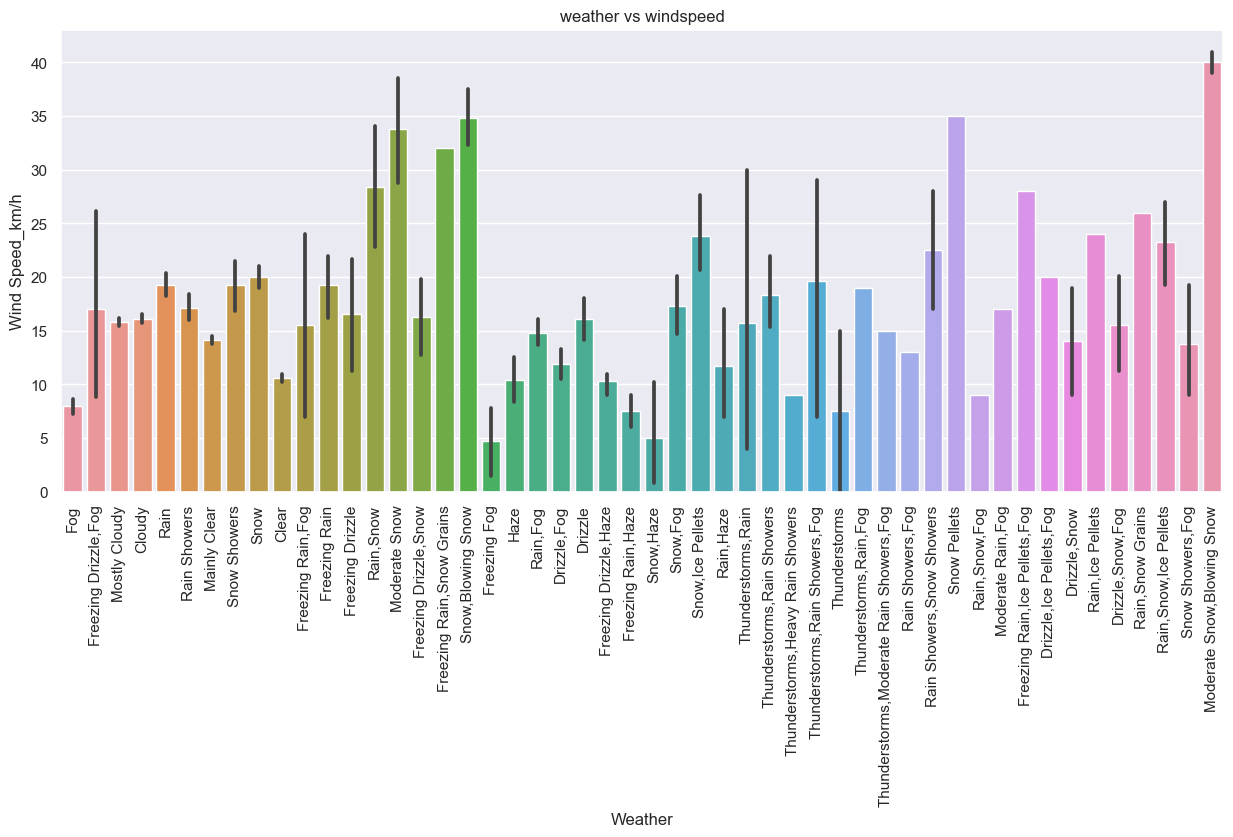

In [82]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
plt.title("weather vs windspeed")
sns.barplot(y=df["Wind Speed_km/h"],x=df["Weather"])

In [83]:
#to plot a timeseries graph against the weather conditions
#convert the date to a date time format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

#set datecolumn as index of the dataframe
df.set_index('Date/Time',inplace=True)


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Temperature Over Time'}, xlabel='Date/Time', ylabel='Temp_C'>

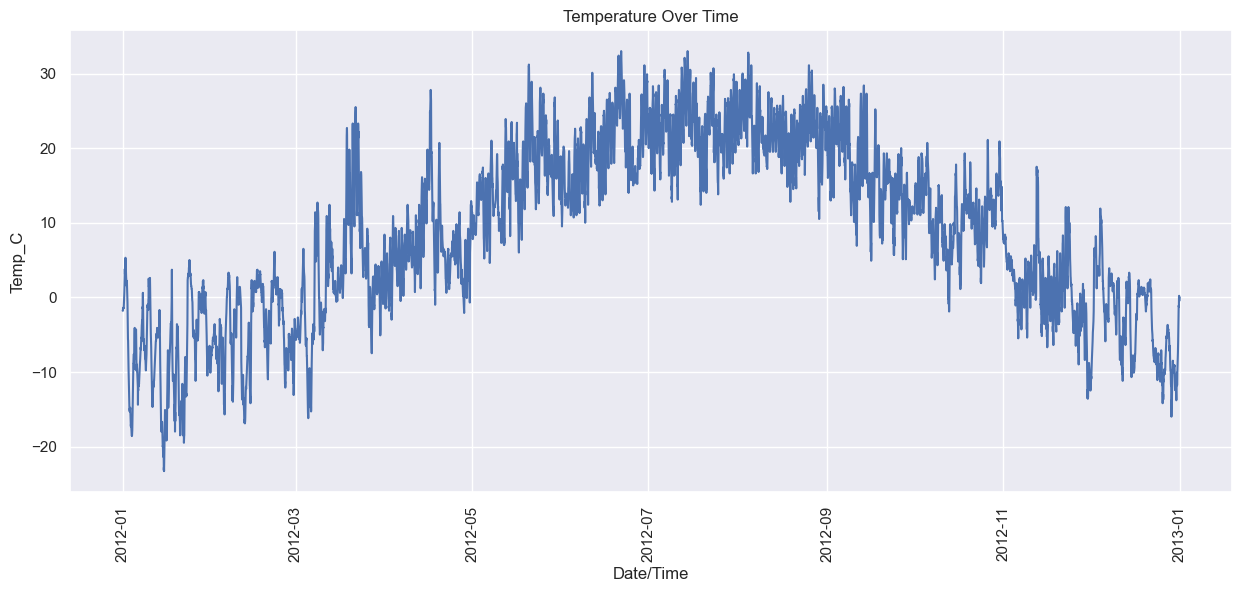

In [84]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
plt.title('Temperature Over Time')
sns.lineplot(y=df["Temp_C"],x=df.index)


<Axes: title={'center': 'Humidity Over Time'}, xlabel='Date/Time', ylabel='Rel Hum_%'>

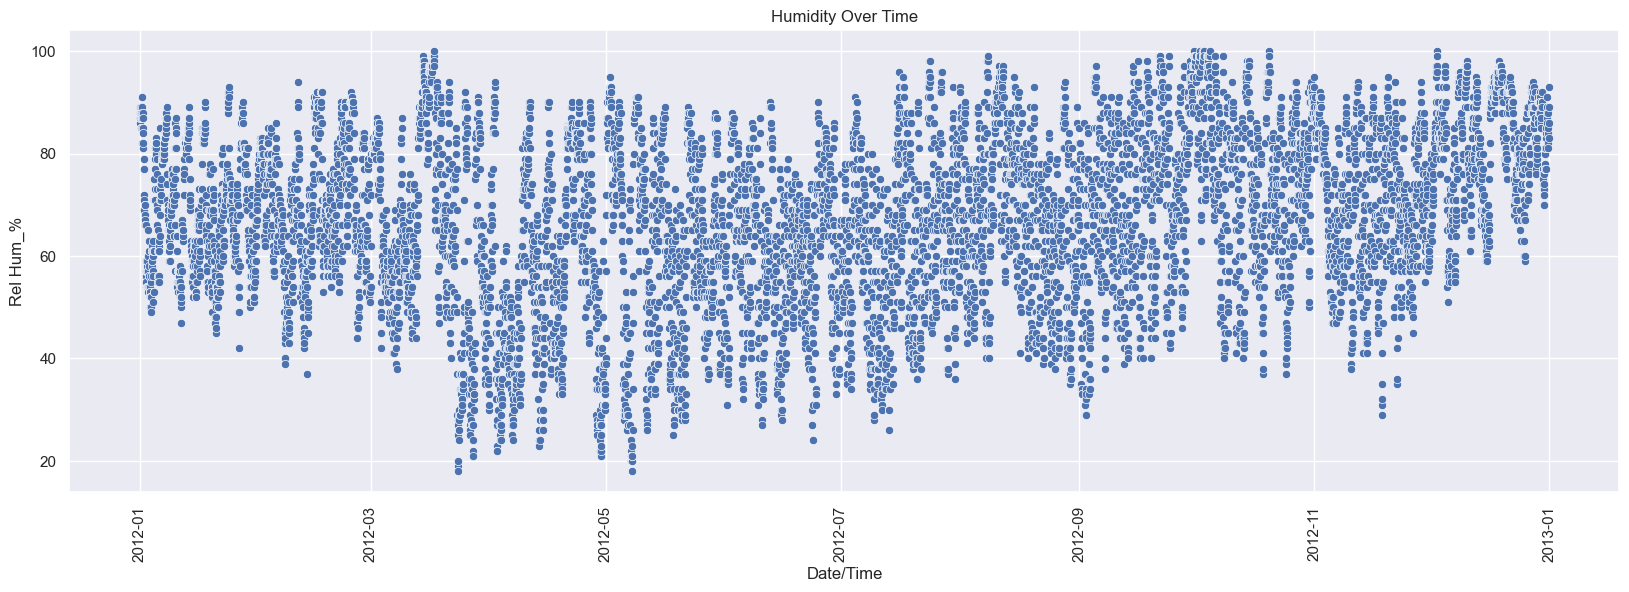

In [85]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
plt.title('Humidity Over Time')
sns.scatterplot(y=df["Rel Hum_%"],x=df.index)

In [86]:
weather=df['Weather']
weather

Date/Time
2012-01-01 00:00:00                     Fog
2012-01-01 01:00:00                     Fog
2012-01-01 02:00:00    Freezing Drizzle,Fog
2012-01-01 03:00:00    Freezing Drizzle,Fog
2012-01-01 04:00:00                     Fog
                               ...         
2012-12-31 19:00:00                    Snow
2012-12-31 20:00:00                    Snow
2012-12-31 21:00:00                    Snow
2012-12-31 22:00:00                    Snow
2012-12-31 23:00:00                    Snow
Name: Weather, Length: 8784, dtype: object